In [170]:
import numpy as np
import math
from sklearn import preprocessing

# Calculating mean crossing rate
def mean_crossing_rate(arr):
    arr = arr - np.mean(arr)
    count = 0
    for i in range(1, len(arr)):
        if arr[i-1]*arr[i] < 0:
            count+=1
    return count

# Extracting mean, median, std, mean crossing rate and correlation between X,Y and Z
def extract_features(data_xyz):
    # Normalizing data before feature extraction
    data_xyz = preprocessing.normalize(data_xyz, axis=0, norm = 'max')
    if data_xyz.shape[0]==0 or data_xyz.shape[1]!=3:
        return None
    features = list()
    for col in range(data_xyz.shape[1]):
        features.append(np.mean(data_xyz[:,col]))
        features.append(np.median(data_xyz[:,col]))
        features.append(np.std(data_xyz[:,col]))
        features.append(mean_crossing_rate(data_xyz[:,col]))
    features.append(np.correlate(data_xyz[:,0], data_xyz[:,1]))
    features.append(np.correlate(data_xyz[:,0], data_xyz[:,2]))
    features.append(np.correlate(data_xyz[:,1], data_xyz[:,2]))
    return features


(4500, 21)
14
(70, 15)
70


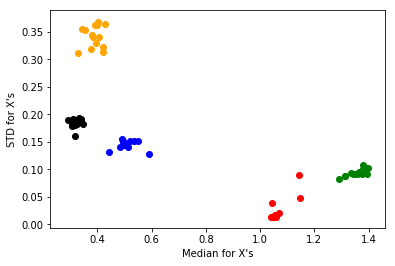

In [171]:
data = np.genfromtxt("sample.csv",delimiter=",", skip_header=1, dtype=float)
print data.shape
window_size = 330
print int(math.ceil(float(data.shape[0])/window_size))
X = np.empty((int(math.ceil(float(data.shape[0])/window_size))*5, 15))
Y = list()
iteration = 0

for cls in range(1, 6):
    i = 0
    while i < data.shape[0]:
        X[iteration] = extract_features(data[i:i+window_size,4*(cls-1)+1:4*(cls-1)+4])
#         if cls <= 2:
#             Y.append(2)
#         else:
#             Y.append(cls)
        Y.append(cls)
        i += window_size
        iteration+=1
print X.shape
print len(Y)
import matplotlib.pyplot as plt
# plt.scatter(X[:16,1], X[:16,2], color='g')
# plt.scatter(X[16:32,1], X[16:32,2], color='r')
# plt.scatter(X[32:48,1], X[32:48,2], color='b')
# plt.scatter(X[48:64,1], X[48:64,2], color='black')
# plt.scatter(X[64:80,1], X[64:80,2], color='orange')
plt.scatter(X[:14,1], X[:14,2], color='g')
plt.scatter(X[14:28,1], X[14:28,2], color='r')
plt.scatter(X[28:42,1], X[28:42,2], color='b')
plt.scatter(X[42:56,1], X[42:56,2], color='black')
plt.scatter(X[56:70,1], X[56:70,2], color='orange')
plt.xlabel("Median for X's")
plt.ylabel("STD for X's")
plt.show()

In [188]:
# SVM Classifier
import mltools as ml
from sklearn import svm, preprocessing
# Normalizing data
X = preprocessing.normalize(X, axis=0, norm = 'max')
# Shuffling data
X,Y = ml.shuffleData(X,Y)
# Split data into training and validation
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.80)

# Training SVM model
clf = svm.SVC(decision_function_shape='ovr',kernel='linear')
clf.fit(Xtr, Ytr)
# Predicting values for validation data
Yhat = clf.predict(Xva)
# print list(Yhat)
# print list(Yva)

error = np.mean( Yhat != Yva )
print "Error rate SVM model:- ", error

Error rate SVM model:-  0.0714285714286


In [185]:
# KNN Classifier
import mltools as ml
from sklearn import neighbors, preprocessing
X = preprocessing.normalize(X, axis=0, norm = 'max')
# Shuffle data
X,Y = ml.shuffleData(X,Y)
# Split data into training and validation
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75)

# Training KNN model
knn=neighbors.KNeighborsClassifier()
knn.fit(Xtr, Ytr)
# Predicting values for validation data
Yhat = knn.predict(Xva)
# print list(Yhat)
# print list(Yva)
print Yhat
error = np.mean( Yhat != Yva )
print "Error rate KNN model:- ", error

# Ytrain = knn.predict(Xtr)
# error = np.mean( Ytrain != Ytr )
# print "Error rate KNN model:- ", error

[3 2 1 1 4 3 1 2 4 2 4 3 5 4 5 5 4]
Error rate KNN model:-  0.0


In [186]:
# import mltools as ml
# from sklearn import svm, preprocessing
# X = preprocessing.normalize(X, axis=0, norm = 'max')
# # Shuffle Data
# X,Y = ml.shuffleData(X,Y)

# # Nfold Cross Validation for SVM Model
# nFolds = 4
# error = [0]*nFolds
# for iFold in range(nFolds):
#     Xti,Xvi,Yti,Yvi = ml.crossValidate(X,Y,nFolds,iFold)
#     clf = svm.SVC(decision_function_shape='ovr',kernel='linear')
#     clf.fit(Xti, Yti)
#     Yhat = clf.predict(Xvi)
#     error[iFold] = np.mean( Yhat != Yvi )
# print "NFold Cross validation error for SVM model:- ", np.mean(error)

# # Nfold Cross Validation for KNN Model
# for iFold in range(nFolds):
#     Xti,Xvi,Yti,Yvi = ml.crossValidate(X,Y,nFolds,iFold)
#     knn=neighbors.KNeighborsClassifier()
#     knn.fit(Xti, Yti)
#     Yhat = knn.predict(Xvi)
#     error[iFold] = np.mean( Yhat != Yvi )
# print "NFold Cross validation error for KNN model:- ", np.mean(error)

In [190]:
dataTest = np.genfromtxt("/Users/bhushan/Desktop/AWS_IR/acc_final.csv",delimiter=",", skip_header=1, dtype=float)
window_size = 330

XTest = np.empty((int(math.ceil(float(dataTest.shape[0])/window_size)), 15))
iteration = 0
i = 0
while i < dataTest.shape[0]:
    XTest[iteration] = extract_features(dataTest[i:i+window_size,:])
    i += window_size
    iteration+=1
print XTest.shape


(55, 15)


In [182]:
YTest = knn.predict(XTest)
print YTest

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [192]:
YTest = clf.predict(XTest)
print YTest

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
